# Data Characteristics
Import our data frames and play around to see what characteristics we have in our data

In [1]:
# import processed df from ../data/processed/df_merged_extended_weather.csv
import pandas as pd
df_merged_extended_weather = pd.read_csv("../data/processed/df_merged_extended_weather.csv")
display(df_merged_extended_weather.shape)
df_merged_extended_weather.tail()

(9334, 15)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours
9329,2018-07-31,0,5.0,31.2875,11.0,1807311,1.0,123.075682,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9330,2018-07-31,0,5.0,31.2875,11.0,1807312,2.0,586.081666,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9331,2018-07-31,0,5.0,31.2875,11.0,1807313,3.0,285.872616,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9332,2018-07-31,0,5.0,31.2875,11.0,1807314,4.0,57.102795,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347
9333,2018-07-31,0,5.0,31.2875,11.0,1807315,5.0,261.341313,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347


In [2]:
import scipy.stats as stats
import seaborn as sns
# Testing Regression
#reg_cols=['Umsatz_umsatz','umsatz_rolling7','KielerWoche_kiwo','Bewoelkung_weather', 'rain_sum', 'sunshine_hours','Temperatur_weather','Windgeschwindigkeit_weather','precipitation_hours','day_of_week']
reg_cols=['Umsatz_umsatz','KielerWoche_kiwo','Bewoelkung_weather', 'rain_sum', 'sunshine_hours','Temperatur_weather','Windgeschwindigkeit_weather','precipitation_hours','day_of_week']
#sns.pairplot(df_merged_extended_weather[reg_cols].dropna())
df_merged_extended_weather[reg_cols].corr()

,Umsatz_umsatz,KielerWoche_kiwo,Bewoelkung_weather,rain_sum,sunshine_hours,Temperatur_weather,Windgeschwindigkeit_weather,precipitation_hours,day_of_week
Umsatz_umsatz,1.000000,0.058244,-0.089410,-0.006203,0.172404,0.222754,0.014656,-0.035543,0.136199
KielerWoche_kiwo,0.058244,1.000000,0.011505,0.023145,0.088911,0.138329,0.020482,0.026237,0.042733
Bewoelkung_weather,-0.089410,0.011505,1.000000,0.272869,-0.650125,-0.391204,0.040599,0.427817,-0.004879
rain_sum,-0.006203,0.023145,0.272869,1.000000,-0.266330,0.029935,0.144634,0.778271,0.012229
sunshine_hours,0.172404,0.088911,-0.650125,-0.266330,1.000000,0.625493,0.075587,-0.376662,-0.017579
Temperatur_weather,0.222754,0.138329,-0.391204,0.029935,0.625493,1.000000,0.004367,-0.113850,0.004351
Windgeschwindigkeit_weather,0.014656,0.020482,0.040599,0.144634,0.075587,0.004367,1.000000,0.191661,-0.005762
precipitation_hours,-0.035543,0.026237,0.427817,0.778271,-0.376662,-0.113850,0.191661,1.000000,-0.007771
day_of_week,0.136199,0.042733,-0.004879,0.012229,-0.017579,0.004351,-0.005762,-0.007771,1.000000


In [3]:
# displaying umsatz correlations
correlations = df_merged_extended_weather[reg_cols].corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

Umsatz_umsatz                  1.000000
Temperatur_weather             0.222754
sunshine_hours                 0.172404
day_of_week                    0.136199
KielerWoche_kiwo               0.058244
Windgeschwindigkeit_weather    0.014656
rain_sum                      -0.006203
precipitation_hours           -0.035543
Bewoelkung_weather            -0.089410
Name: Umsatz_umsatz, dtype: float64


Check on which days we have high sales

day_of_week
6    246.495651
5    241.319882
4    196.796023
0    193.688449
3    193.232274
1    187.944440
2    187.477523
Name: Umsatz_umsatz, dtype: float64


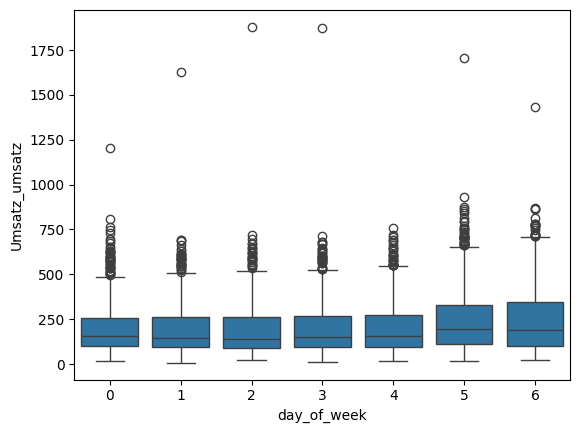

In [4]:
# check on which day of week have high sales
sns.boxplot(x='day_of_week', y='Umsatz_umsatz', data=df_merged_extended_weather)
# Calculate average sales per day of the week
avg_sales_by_day = df_merged_extended_weather.groupby('day_of_week')['Umsatz_umsatz'].mean().sort_values(ascending=False)
print(avg_sales_by_day)

month
8     288.522492
7     271.829358
6     226.627640
9     213.935441
5     211.430539
10    210.002890
4     197.351662
2     185.515356
3     182.284023
12    169.640144
1     167.972552
11    154.596543
Name: Umsatz_umsatz, dtype: float64


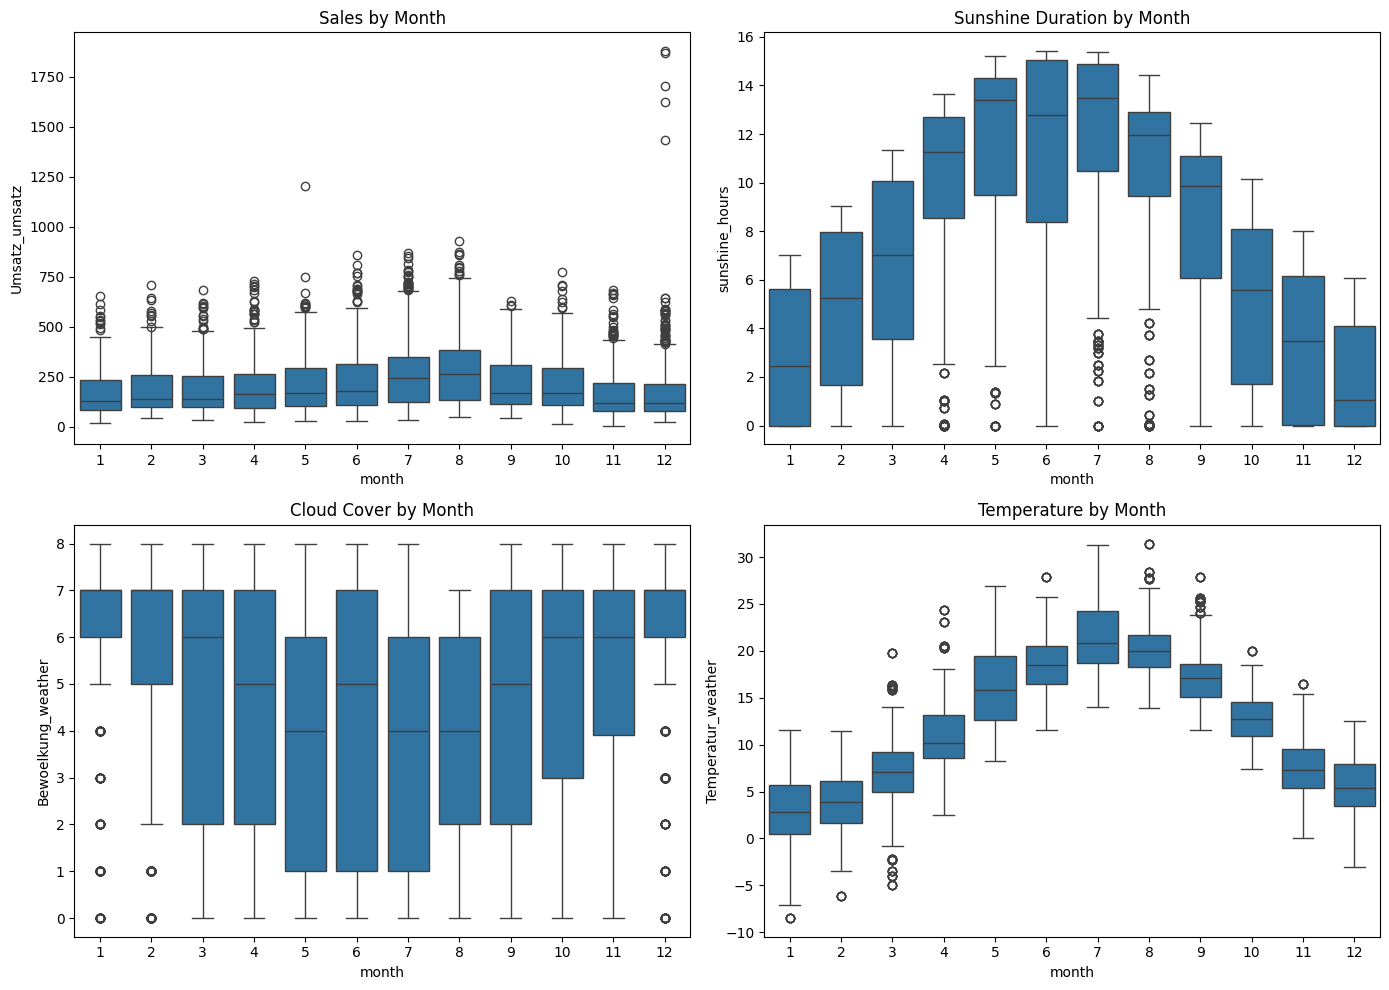

In [5]:
# Extract month from date column (adjust 'Datum' if the column name differs)
df_merged_extended_weather['month'] = pd.to_datetime(df_merged_extended_weather['Datum']).dt.month

# Calculate average sales per month
avg_sales_by_month = df_merged_extended_weather.groupby('month')['Umsatz_umsatz'].mean().sort_values(ascending=False)
print(avg_sales_by_month)

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sales by month
sns.boxplot(ax=axes[0, 0], x='month', y='Umsatz_umsatz', data=df_merged_extended_weather)
axes[0, 0].set_title('Sales by Month')

# Sunshine duration by month
sns.boxplot(ax=axes[0, 1], x='month', y='sunshine_hours', data=df_merged_extended_weather)
axes[0, 1].set_title('Sunshine Duration by Month')

# Cloud cover by month
sns.boxplot(ax=axes[1, 0], x='month', y='Bewoelkung_weather', data=df_merged_extended_weather)
axes[1, 0].set_title('Cloud Cover by Month')

sns.boxplot(ax=axes[1, 1], x='month', y='Temperatur_weather', data=df_merged_extended_weather)
axes[1, 1].set_title('Temperature by Month')

plt.tight_layout()
plt.show()

Warengruppe_umsatz
1.0    222177.223458
2.0    732143.699518
3.0    297117.132705
4.0    155326.837913
5.0    503491.030149
6.0     19539.657423
Name: Umsatz_umsatz, dtype: float64


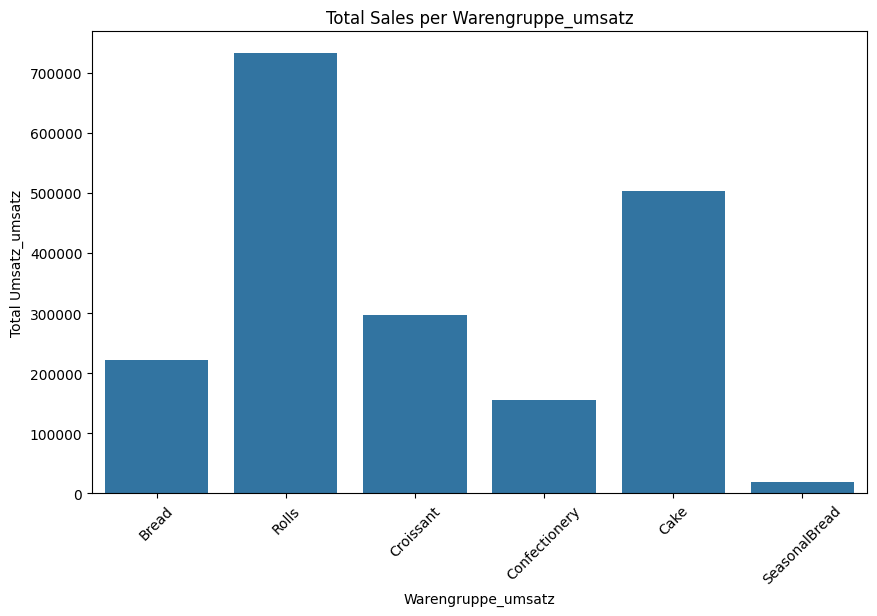

In [6]:
# Calculate total sales per Warengruppe_umsatz
import matplotlib.pyplot as plt
total_sales_by_group = df_merged_extended_weather.groupby('Warengruppe_umsatz')['Umsatz_umsatz'].sum().sort_index()
print(total_sales_by_group)

# Visualize total sales per Warengruppe_umsatz
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_group.index, y=total_sales_by_group.values)
plt.title('Total Sales per Warengruppe_umsatz')
plt.xlabel('Warengruppe_umsatz')
plt.ylabel('Total Umsatz_umsatz')
labels = ['Bread', 'Rolls', 'Croissant', 'Confectionery', 'Cake', 'SeasonalBread']
plt.xticks(ticks=range(len(total_sales_by_group)), labels=labels, rotation=45)
plt.show()

# Check with Holidays

In [7]:
# import processed df from ../data/processed/df_extended_weather_holidays.csv
df_merged_extended_weather = pd.read_csv("../data/processed/df_extended_weather_holidays.csv")
display(df_merged_extended_weather.shape)
df_merged_extended_weather.tail()

(9334, 17)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday
9329,2018-07-31,0,5.0,31.2875,11.0,1807311,1.0,123.075682,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9330,2018-07-31,0,5.0,31.2875,11.0,1807312,2.0,586.081666,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9331,2018-07-31,0,5.0,31.2875,11.0,1807313,3.0,285.872616,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9332,2018-07-31,0,5.0,31.2875,11.0,1807314,4.0,57.102795,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1
9333,2018-07-31,0,5.0,31.2875,11.0,1807315,5.0,261.341313,1,Tuesday,0.0,46462.85,0.0,26.8,12.906347,0,1


In [8]:
# shift -1 for next_day_holiday from public_holiday column
#df_merged_extended_weather['next_day_holiday'] = df_merged_extended_weather['public_holiday'].shift(-1)

#write temp csv only write Datum, public_holiday, next_day_holiday
#df_merged_extended_weather[['Datum', 'public_holiday', 'next_day_holiday']].to_csv("../data/processed/df_extended_weather_holidays_nextdayholiday.csv", index=False)

# check correlation of umsatz with all other columns except Datum
correlations = df_merged_extended_weather.drop(columns=['Datum','day']).corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

Umsatz_umsatz                  1.000000
temperature_2m_mean            0.224834
Temperatur_weather             0.222754
school_holiday                 0.175640
sunshine_duration              0.172404
sunshine_hours                 0.172404
day_of_week                    0.136199
KielerWoche_kiwo               0.058244
public_holiday                 0.043574
Windgeschwindigkeit_weather    0.014656
rain_sum                      -0.006203
precipitation_hours           -0.035543
Warengruppe_umsatz            -0.062589
id_umsatz                     -0.086929
Bewoelkung_weather            -0.089410
Name: Umsatz_umsatz, dtype: float64


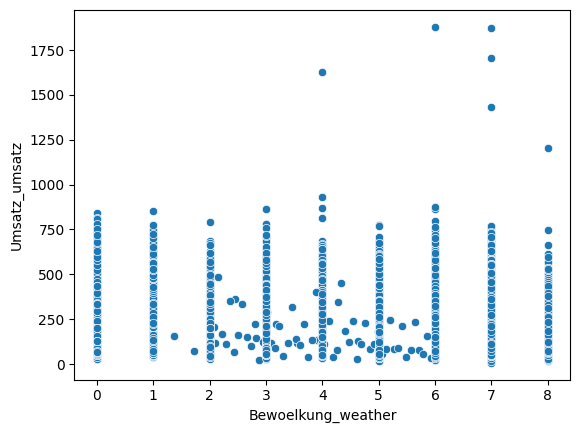

(9334, 17)

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,id_umsatz,Warengruppe_umsatz,Umsatz_umsatz,day_of_week,day,precipitation_hours,sunshine_duration,rain_sum,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday
6711,2017-02-22,0,6.0,7.3750,20.0,1702224,4.0,58.172333,2,Wednesday,10.0,10704.13,11.5,6.7,2.973369,0,0
1312,2014-03-14,0,1.0,9.6125,10.0,1403144,4.0,83.095661,4,Friday,0.0,32363.34,0.0,6.1,8.989817,0,0
6429,2016-12-27,0,6.0,8.2500,21.0,1612274,4.0,47.067432,1,Tuesday,3.0,19832.45,0.4,7.3,5.509014,0,1
2293,2014-10-04,0,0.0,18.5000,8.0,1410042,2.0,677.822064,5,Saturday,0.0,36193.04,0.0,14.9,10.053622,0,0
5338,2016-05-26,0,7.0,14.3750,6.0,1605261,1.0,118.058961,3,Thursday,14.0,4922.03,4.6,14.4,1.367231,0,0


In [9]:

sns.scatterplot(x='Bewoelkung_weather', y='Umsatz_umsatz', data=df_merged_extended_weather)
plt.show()
# dropping columns which have negative correlation with umsatz
# cols_to_drop = correlations[correlations < 0].index.tolist()
# df_final = df_merged_extended_weather.drop(columns=cols_to_drop)
#print(f"Dropped columns: {cols_to_drop}")
df_final = df_merged_extended_weather.copy()
display(df_final.shape)
df_final.sample(5)

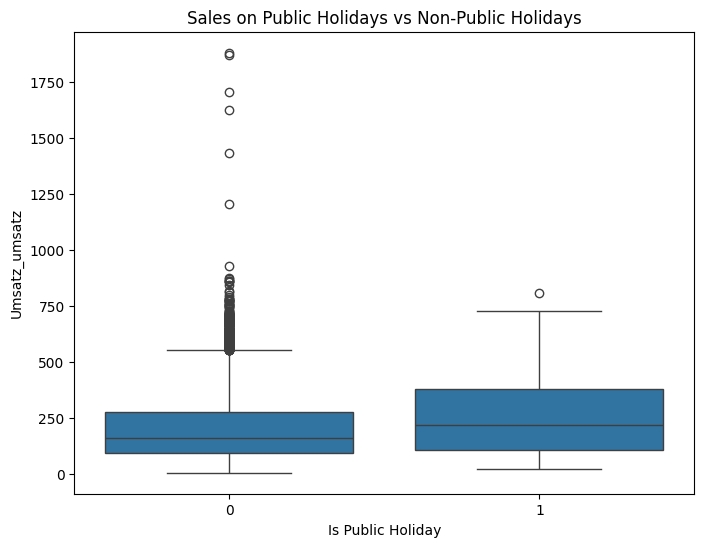

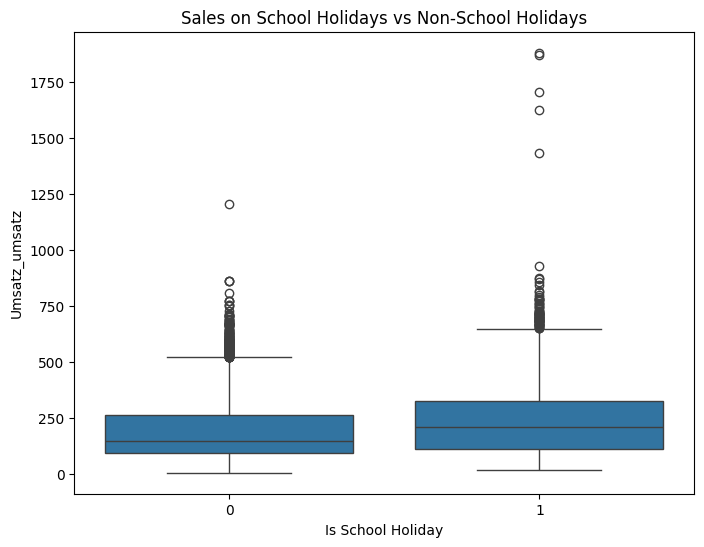

ValueError: Could not interpret value `next_day_holiday` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [10]:
# check if there was effect of public holidays and school holidays on sales
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot for public holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='public_holiday', y='Umsatz_umsatz', data=df_final)
plt.title('Sales on Public Holidays vs Non-Public Holidays')
plt.xlabel('Is Public Holiday')
plt.ylabel('Umsatz_umsatz')
plt.show()
# Boxplot for school holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='school_holiday', y='Umsatz_umsatz',
            data=df_final)
plt.title('Sales on School Holidays vs Non-School Holidays')
plt.xlabel('Is School Holiday')
plt.ylabel('Umsatz_umsatz')
plt.show()
# Boxplot for next day holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='next_day_holiday', y='Umsatz_umsatz',
            data=df_final)
plt.title('Sales on Next Day Holidays vs Non-Next Day Holidays')
plt.xlabel('Is Next Day Holiday')
plt.ylabel('Umsatz_umsatz')
plt.show()


# check their significance using t-test
public_holiday_sales = df_final[df_final['public_holiday'] == 1]['Umsatz_umsatz']
non_public_holiday_sales = df_final[df_final['public_holiday'] == 0]['Umsatz_umsatz']
t_stat, p_value = stats.ttest_ind(public_holiday_sales, non_public_holiday_sales, equal_var=False)
print(f"T-test for Public Holidays: t-statistic = {t_stat}, p-value = {p_value}")   
school_holiday_sales = df_final[df_final['school_holiday'] == 1]['Umsatz_umsatz']
non_school_holiday_sales = df_final[df_final['school_holiday'] == 0]['Umsatz_umsatz']
t_stat, p_value = stats.ttest_ind(school_holiday_sales, non_school_holiday_sales, equal_var=False)
print(f"T-test for School Holidays: t-statistic = {t_stat}, p-value = {p_value}")
#also checking next_day_holiday significance
next_day_holiday_sales = df_final[df_final['next_day_holiday'] == 1]['Umsatz_umsatz']
non_next_day_holiday_sales = df_final[df_final['next_day_holiday'] == 0]['Umsatz_umsatz']
t_stat, p_value = stats.ttest_ind(next_day_holiday_sales, non_next_day_holiday_sales, equal_var=False)
print(f"T-test for Next Day Holidays: t-statistic = {t_stat}, p-value = {p_value}") 
# check 




## Exploring training data cleaned one

In [11]:
import pandas as pd
# import df_train_cleaned.csv from ../data/processed/df_train_cleaned.csv
df_train_clean = pd.read_csv("../data/processed/df_train_data_cleaned.csv")
df_validation_clean = pd.read_csv("../data/processed/df_validation_data_cleaned.csv")

#print shapes
print(f"Train data shape: {df_train_clean.shape}")
print(f"Validation data shape: {df_validation_clean.shape}")

Train data shape: (7487, 17)
Validation data shape: (1841, 18)


In [12]:
# experimenting with extra variables
df_train_clean.head()

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,Warengruppe_umsatz,Umsatz_umsatz,umsatz_rolling7,day_of_week,is_saturday,is_sunday,sunshine_duration,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday,next_day_holiday
0,2013-07-01,0.0,6.0,17.8375,15.0,1.0,148.828353,148.828353,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
1,2013-07-01,0.0,6.0,17.8375,15.0,2.0,535.856285,221.786925,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
2,2013-07-01,0.0,6.0,17.8375,15.0,3.0,201.198426,592.534505,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
3,2013-07-01,0.0,6.0,17.8375,15.0,4.0,65.890169,311.369828,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0
4,2013-07-01,0.0,6.0,17.8375,15.0,5.0,317.475875,109.314600,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0


In [13]:

df_train_clean = df_train_clean.sort_values('Datum')

# Compute daily temperature difference
daily_temp = df_train_clean.groupby('Datum')['Temperatur_weather'].first().reset_index()
daily_temp['temp_diff'] = daily_temp['Temperatur_weather'] - daily_temp['Temperatur_weather'].shift(1)

# Merge back to original DataFrame
df_train_clean = df_train_clean.merge(daily_temp[['Datum', 'temp_diff']], on='Datum', how='left')

daily_cloud = df_train_clean.groupby('Datum')['Bewoelkung_weather'].first().reset_index()
daily_cloud['bewoelkung_diff'] = daily_cloud['Bewoelkung_weather'] - daily_cloud['Bewoelkung_weather'].shift(1)

# Merge back to original DataFrame
df_train_clean = df_train_clean.merge(daily_cloud[['Datum', 'bewoelkung_diff']], on='Datum', how='left')


df_train_clean.head()  # Verify

,Datum,KielerWoche_kiwo,Bewoelkung_weather,Temperatur_weather,Windgeschwindigkeit_weather,Warengruppe_umsatz,Umsatz_umsatz,umsatz_rolling7,day_of_week,is_saturday,is_sunday,sunshine_duration,temperature_2m_mean,sunshine_hours,public_holiday,school_holiday,next_day_holiday,temp_diff,bewoelkung_diff
0,2013-07-01,0.0,6.0,17.8375,15.0,1.0,148.828353,148.828353,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
1,2013-07-01,0.0,6.0,17.8375,15.0,2.0,535.856285,221.786925,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
2,2013-07-01,0.0,6.0,17.8375,15.0,3.0,201.198426,592.534505,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
3,2013-07-01,0.0,6.0,17.8375,15.0,4.0,65.890169,311.369828,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN
4,2013-07-01,0.0,6.0,17.8375,15.0,5.0,317.475875,109.314600,0,0,0,31025.67,15.6,8.618242,0.0,1.0,0.0,NaN,NaN


In [14]:
#drop non numeric columns for correlation check
df_train_clean_numeric = df_train_clean.select_dtypes(include=['number'])

# Add month column and last day of year column
df_train_clean_numeric['month'] = pd.to_datetime(df_train_clean['Datum']).dt.month
df_train_clean_numeric['is_last_day_of_year'] = pd.to_datetime(df_train_clean['Datum']).dt.is_year_end.astype(int)

#remove sunshine_duration, Umsatz_umsatz,umsatz_rolling7  column if exists
if 'sunshine_duration' in df_train_clean_numeric.columns:
    df_train_clean_numeric = df_train_clean_numeric.drop(columns=['sunshine_duration'])
if 'Umsatz_umsatz' in df_train_clean_numeric.columns:
    df_train_clean_numeric = df_train_clean_numeric.drop(columns=['Umsatz_umsatz'])
if 'umsatz_rolling7' in df_train_clean_numeric.columns:
    df_train_clean_numeric = df_train_clean_numeric.drop(columns=['umsatz_rolling7'])  

# check correlation of temp_diff and Temperature_weather with umsatz
correlations = df_train_clean_numeric.corr()['Umsatz_umsatz'].sort_values(ascending=False)
print(correlations)

KeyError: 'Umsatz_umsatz'

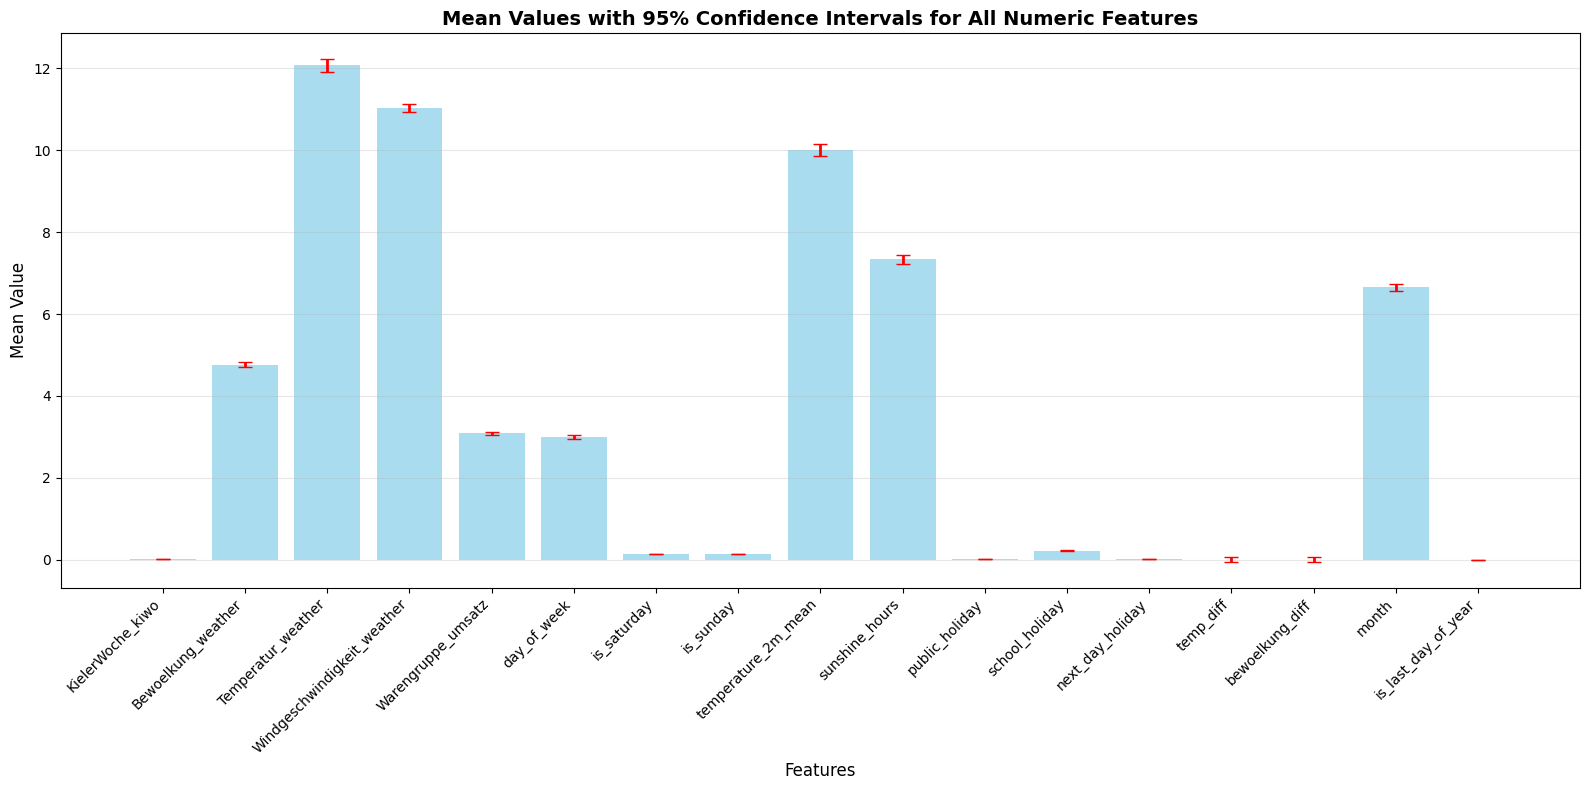


Summary Statistics with 95% Confidence Intervals:
--------------------------------------------------------------------------------
KielerWoche_kiwo              : Mean =       0.02, CI = [      0.02,       0.03]
Bewoelkung_weather            : Mean =       4.76, CI = [      4.70,       4.82]
Temperatur_weather            : Mean =      12.08, CI = [     11.92,      12.24]
Windgeschwindigkeit_weather   : Mean =      11.03, CI = [     10.94,      11.12]
Warengruppe_umsatz            : Mean =       3.09, CI = [      3.05,       3.12]
day_of_week                   : Mean =       2.99, CI = [      2.94,       3.03]
is_saturday                   : Mean =       0.14, CI = [      0.13,       0.15]
is_sunday                     : Mean =       0.14, CI = [      0.13,       0.15]
temperature_2m_mean           : Mean =      10.01, CI = [      9.87,      10.15]
sunshine_hours                : Mean =       7.34, CI = [      7.23,       7.45]
public_holiday                : Mean =       0.01, CI = [ 

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get all numeric columns
numeric_cols = df_train_clean_numeric.columns.tolist()

# Calculate mean and 95% confidence interval for each column
means = []
ci_lower = []
ci_upper = []
labels = []

for col in numeric_cols:
    data = df_train_clean_numeric[col].dropna()
    if len(data) > 0:
        mean = data.mean()
        std_err = stats.sem(data)
        ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
        
        means.append(mean)
        ci_lower.append(mean - ci[0])
        ci_upper.append(ci[1] - mean)
        labels.append(col)

# Create bar chart with error bars
fig, ax = plt.subplots(figsize=(16, 8))
x_pos = np.arange(len(labels))

ax.bar(x_pos, means, yerr=[ci_lower, ci_upper], 
       capsize=5, alpha=0.7, color='skyblue', 
       error_kw={'elinewidth': 2, 'ecolor': 'red'})

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Mean Values with 95% Confidence Intervals for All Numeric Features', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics with 95% Confidence Intervals:")
print("-" * 80)
for i, label in enumerate(labels):
    print(f"{label:30s}: Mean = {means[i]:10.2f}, CI = [{means[i]-ci_lower[i]:10.2f}, {means[i]+ci_upper[i]:10.2f}]")
